In [1]:
from impedance import preprocessing
import pandas as pd
import os


data_path = os.path.join("wyniki", "eis_mo_przed-filtrem.txt")

data = pd.read_csv(data_path, sep="\t")


# frequencies, Z = data.iloc[:,0,], data.iloc[:,1] - 1j*data.iloc[:,2]
frequencies, Z = data.iloc[:,0], data.iloc[:,1] + 1j*data.iloc[:,2]


# # keep only the impedance data in the first quandrant
frequencies, Z = preprocessing.ignoreBelowX(frequencies, Z)

In [2]:
frequencies

3     63613.422000
4     43423.398000
5     29644.816000
6     20236.418000
10     4393.592300
30        2.120659
32        0.988677
35        0.314526
36        0.214505
37        0.146408
Name: freq/Hz, dtype: float64

In [3]:
Z

3     0.179265-0.014779j
4     0.194587-0.037236j
5     0.160397-0.009709j
6     0.196357-0.004241j
10    0.263958-0.003566j
30    2.410655-0.622222j
32    3.119394-1.742885j
35   -1.057626-2.217702j
36    2.325811-6.017707j
37    7.460203-2.485014j
dtype: complex128

In [4]:
from impedance.models.circuits import CustomCircuit

circuit = 'R0-p(CPE1,R1)'
initial_guess = [100, 1, 1, 100]

circuit_model = CustomCircuit(circuit, initial_guess=initial_guess)

In [5]:
max(Z.values.real)

np.float64(7.4602027)

In [6]:
circuit_model.plot()

ValueError: max() iterable argument is empty

In [ ]:
circuit_model.fit(frequencies, Z)

In [ ]:
circuit_model.parameters_

array([0.621793  , 0.12362864, 1.        , 8.60202753])

In [ ]:
Z_fit = circuit_model.predict(frequencies)

In [ ]:
Z_fit

array([0.621793  -2.02372870e-05j, 0.621793  -2.96467604e-05j,
       0.621793  -4.34262462e-05j, 0.621793  -6.36161537e-05j,
       0.62179301-2.93009225e-04j, 0.66442169-6.04049688e-01j,
       0.81448042-1.27293916e+00j, 2.20980987-3.33741925e+00j,
       3.43810981-4.03663156e+00j, 5.01721392-4.29997752e+00j])

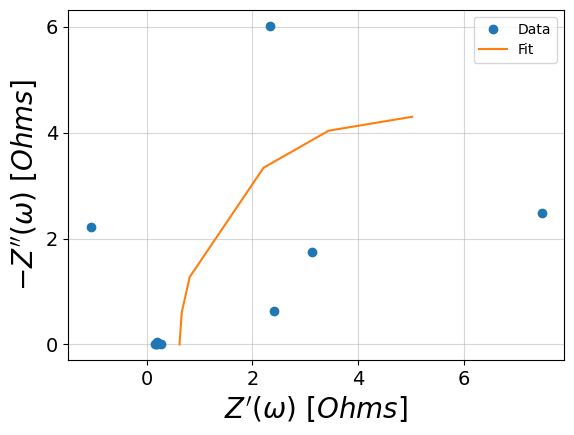

In [ ]:
import matplotlib.pyplot as plt
from impedance.visualization import plot_nyquist

fig, ax = plt.subplots()
plot_nyquist(Z, fmt='o', scale=1, ax=ax)
plot_nyquist(Z_fit, fmt='-', scale=1, ax=ax)

plt.legend(['Data', 'Fit'])
plt.show()